In [178]:
from sklearn import svm, tree
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
import scikitplot as skplt

In [179]:

def read_pickle(filepath):
    data_df = pd.read_pickle(filepath)
    print(data_df.shape)
    data_df[["glove_cosine1", "glove_cosine2", "glove_cosine3", "glove_cosine4","glove_cosine5","glove_cosine6","glove_cosine7","glove_cosine8","glove_cosine9","glove_cosine10"]] = pd.DataFrame(data_df.glove_cosine.values.tolist(), index=data_df.index)
    data_df[["glove_euclidean1", "glove_euclidean2", "glove_euclidean3","glove_euclidean4","glove_euclidean5","glove_euclidean6","glove_euclidean7","glove_euclidean8","glove_euclidean9","glove_euclidean10"]] = pd.DataFrame(data_df.glove_euclidean.values.tolist(), index=data_df.index)
    data_df[["tfidf_euclidean1","tfidf_euclidean2","tfidf_euclidean3","tfidf_euclidean4","tfidf_euclidean5","tfidf_euclidean6","tfidf_euclidean7","tfidf_euclidean8","tfidf_euclidean9","tfidf_euclidean10"]] = pd.DataFrame(data_df.tfidf_euclidean.values.tolist(), index=data_df.index)
    data_df[["tfidf_cosine1","tfidf_cosine2","tfidf_cosine3","tfidf_cosine4","tfidf_cosine5","tfidf_cosine6","tfidf_cosine7","tfidf_cosine8","tfidf_cosine9","tfidf_cosine10"]] = pd.DataFrame(data_df.tfidf_cosine.values.tolist(), index=data_df.index)
    data_df[["dependency1", "dependency2", "dependency3", "dependency4","dependency5","dependency6","dependency7","dependency8","dependency9","dependency10"]] = pd.DataFrame(data_df.dependency.values.tolist(), index=data_df.index)
    data_df.drop(
        columns=["glove_cosine", "glove_euclidean", "tfidf_euclidean", "tfidf_cosine", "dependency","sentences_len"],
        inplace=True)
    labels = data_df["target"]
    data_df.drop(columns=["target"], inplace=True)
    # print(data_df.columns)
    return data_df.to_numpy(), labels.to_numpy()


In [180]:
train_path = "D:/ml_project/previous_data/preprocess_ml_train.pkl"
dev_path  = "D:/ml_project/previous_data/preprocess_ml_dev.pkl"


In [181]:
train_X, train_Y = read_pickle(train_path)
dev_X, dev_Y = read_pickle(dev_path)

(76595, 7)
(5319, 7)


In [182]:
# train_X, train_Y = train_X[:1000], train_Y[:1000]
# dev_X, dev_Y = dev_X[:1000], dev_Y[:1000]

In [183]:
dev_X.shape,dev_Y.shape,train_X.shape

((5319, 50), (5319,), (76595, 50))

In [184]:
set(train_Y)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [185]:
# scalar = RobustScaler()
# transformer = scalar.fit(train_X)

In [186]:
# train_X_transformed = transformer.transform(train_X)
# dev_X_transformed = transformer.transform(dev_X)

In [187]:
models = []
models.append(("DT",tree.DecisionTreeClassifier(max_depth=10)))
models.append(("RF", RandomForestClassifier(min_samples_leaf=8, n_estimators=60)))
# clf = LogisticRegression(multi_class='ovr',solver='newton-cg')
clf = tree.DecisionTreeClassifier(max_depth=10)
models.append(("SVM",SVC(kernel='poly', degree=10, max_iter = 1000000)))
models.append(("GB",GradientBoostingClassifier(min_samples_leaf=8, n_estimators=60)))

In [188]:
# for name, model in models:
#     print(name+' Training')
# model.fit(train_X,train_Y)
#     filename = name+'.sav'
#     pickle.dump(model, open(filename, 'wb'))

print('LR Training')
clf.fit(train_X,train_Y)
# filename = './previous_data/LR.sav'
# pickle.dump(cla, open(filename, 'wb'))


LR Training


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
y_pred = clf.predict(dev_X)
y_score = clf.predict_proba(dev_X)
dev_accu = accuracy_score(dev_Y, y_pred)
dev_accu

0.7535250987027636

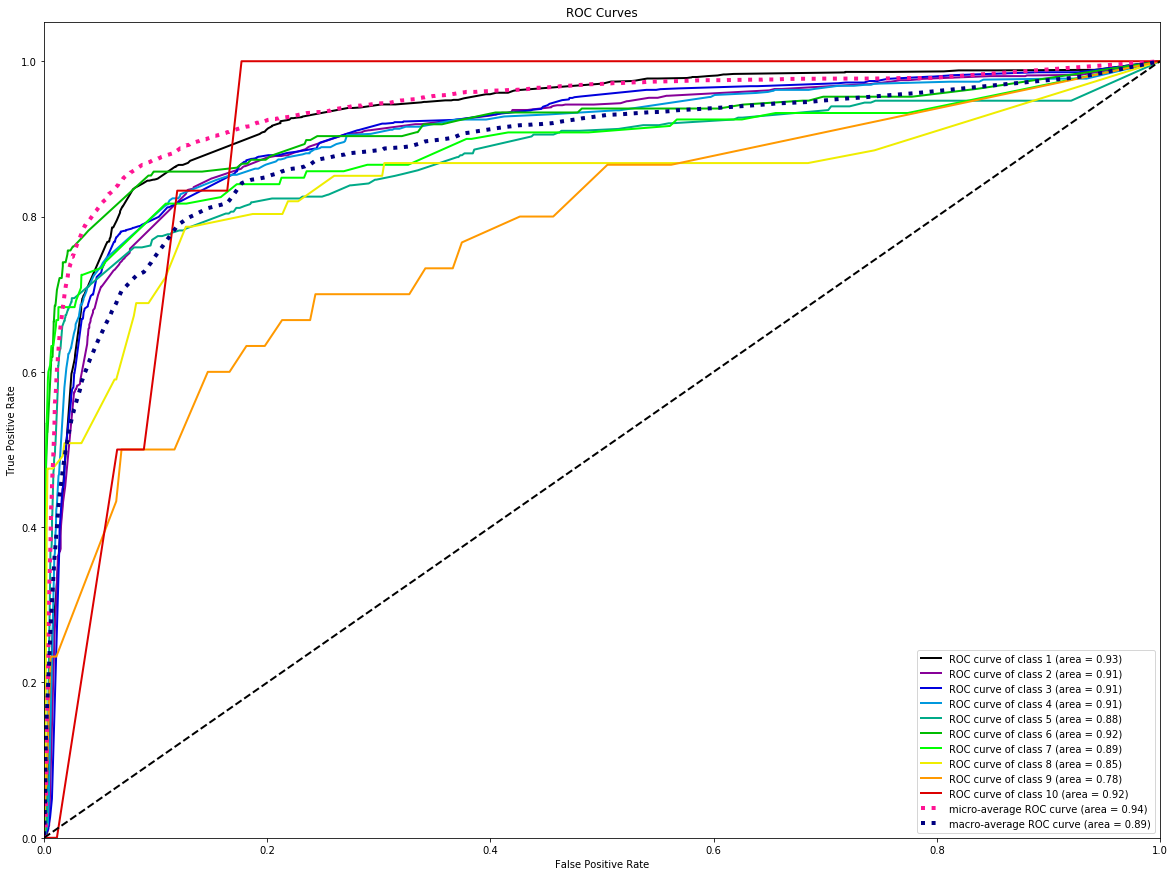

In [190]:
f, axes = plt.subplots(1,1, figsize=(20, 15), sharex=False)
skplt.metrics.plot_roc(dev_Y, y_score,ax=axes)

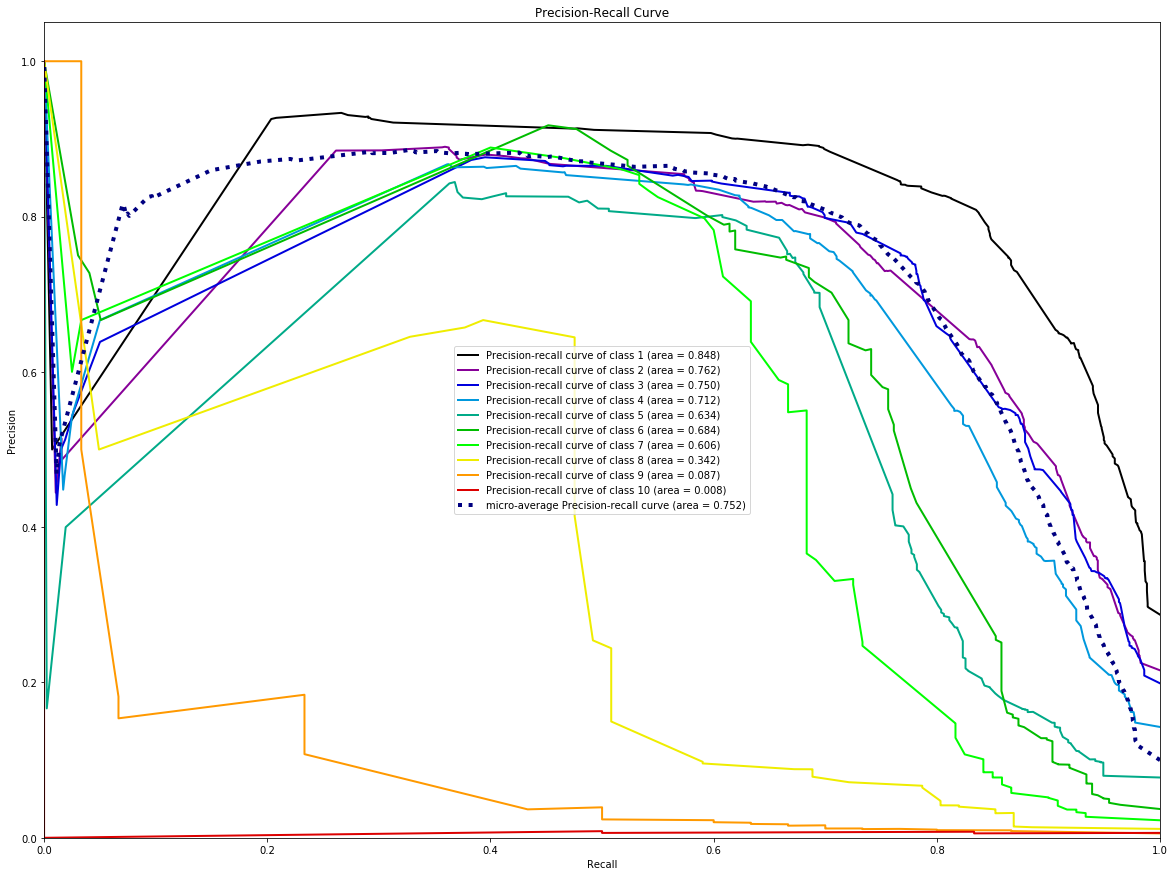

In [191]:
f, axes = plt.subplots(1,1, figsize=(20, 15), sharex=False)
skplt.metrics.plot_precision_recall(dev_Y, y_score,ax=axes)


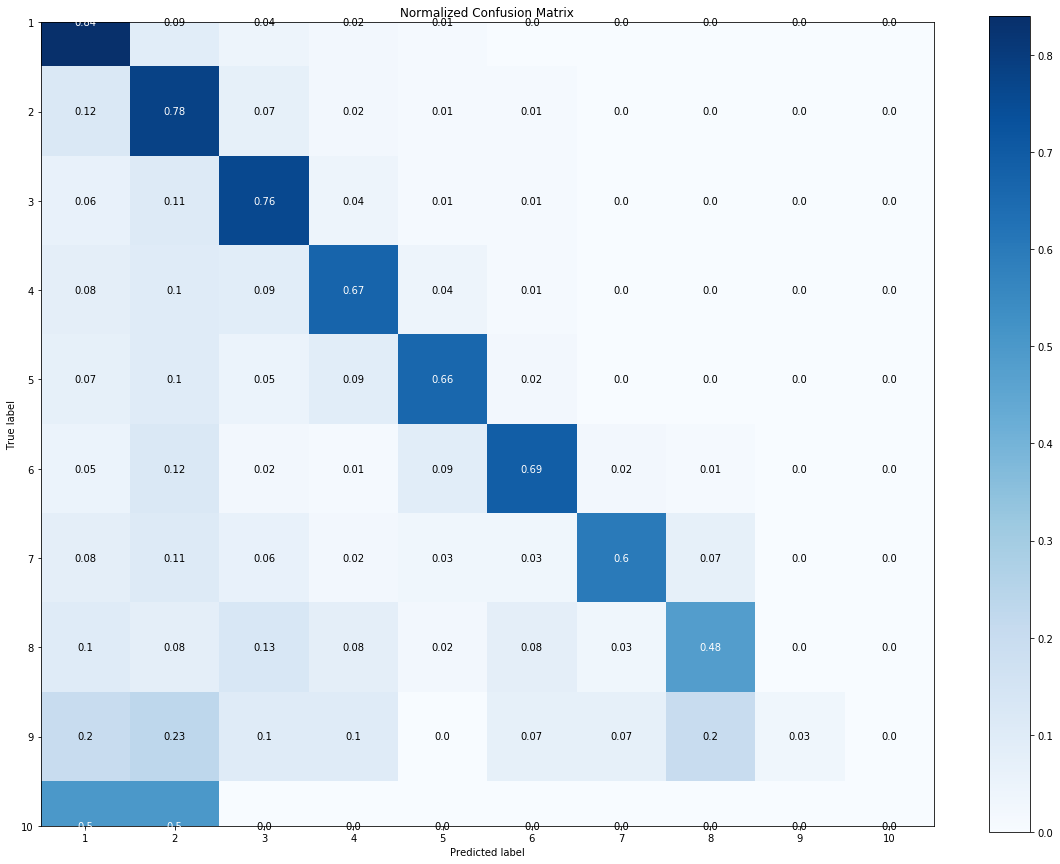

In [192]:
f, axes = plt.subplots(1,1, figsize=(20, 15), sharex=False)
skplt.metrics.plot_confusion_matrix(dev_Y, y_pred, normalize=True,ax=axes)
plt.show()

In [195]:
res = classification_report(dev_Y,y_pred)
print(res)

              precision    recall  f1-score   support

           1       0.80      0.84      0.82      1528
           2       0.68      0.78      0.73      1147
           3       0.76      0.76      0.76      1058
           4       0.78      0.67      0.72       759
           5       0.75      0.66      0.70       413
           6       0.74      0.69      0.71       197
           7       0.78      0.60      0.68       120
           8       0.64      0.48      0.55        61
           9       1.00      0.03      0.06        30
          10       0.00      0.00      0.00         6

    accuracy                           0.75      5319
   macro avg       0.69      0.55      0.57      5319
weighted avg       0.76      0.75      0.75      5319

